## Homework 8. Neural Networks for Computer Vision

In [4]:
# !wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

In [13]:
# !unzip dino-dragon.zip -d ./data/

In [1]:
#!g1.1
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [2]:
tf.__version__

'2.6.0'

### Load image example

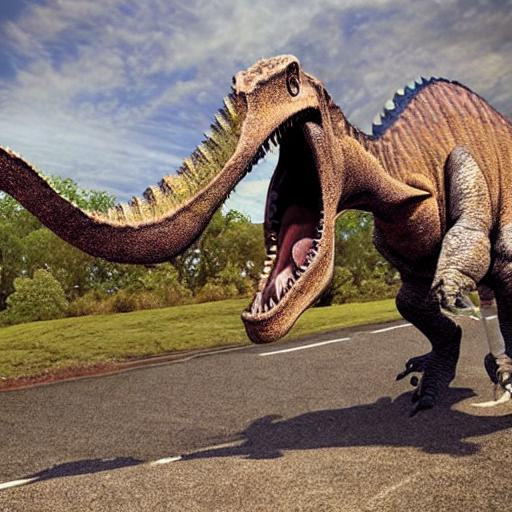

In [3]:
path = "./data/train/dino/"
name = "008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg"
fullname = f'{path}/{name}'
load_img(fullname)

### Create data generators

In [4]:
#!g1.1
batch_size = 20

data_gen = ImageDataGenerator(rescale=1./255)
train_generator = data_gen.flow_from_directory(
    "./data/train",
    target_size=(150, 150),
    class_mode="binary", 
    batch_size=batch_size, 
    shuffle=True
)
test_generator = data_gen.flow_from_directory(
    "./data/test", 
    target_size=(150, 150),
    class_mode="binary", 
    batch_size=batch_size, 
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


### Create the model

In [5]:
#!g1.1
model = keras.models.Sequential()
model.add(
    keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        input_shape=(150, 150, 3), 
        activation="relu"
    )
)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8), 
    loss=keras.losses.BinaryCrossentropy(), 
    metrics=["accuracy"]
)

model.summary()

2022-11-23 14:50:18.704934: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 14:50:19.567674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30995 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8c:00.0, compute capability: 7.0


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [6]:
#!g1.1
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

2022-11-23 14:50:21.507346: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-23 14:50:22.669455: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


Epoch 1/10
80/80 [==============================] - 11s 110ms/step - loss: 0.6589 - accuracy: 0.6317 - val_loss: 0.5961 - val_accuracy: 0.7386
Epoch 2/10
80/80 [==============================] - 7s 86ms/step - loss: 0.5449 - accuracy: 0.7535 - val_loss: 0.4727 - val_accuracy: 0.8376
Epoch 3/10
80/80 [==============================] - 5s 66ms/step - loss: 0.4508 - accuracy: 0.8162 - val_loss: 0.3996 - val_accuracy: 0.8553
Epoch 4/10
80/80 [==============================] - 5s 65ms/step - loss: 0.3894 - accuracy: 0.8425 - val_loss: 0.3581 - val_accuracy: 0.8553
Epoch 5/10
80/80 [==============================] - 5s 68ms/step - loss: 0.3450 - accuracy: 0.8601 - val_loss: 0.4080 - val_accuracy: 0.8173
Epoch 6/10
80/80 [==============================] - 5s 65ms/step - loss: 0.3183 - accuracy: 0.8777 - val_loss: 0.3706 - val_accuracy: 0.8325
Epoch 7/10
80/80 [==============================] - 5s 65ms/step - loss: 0.2733 - accuracy: 0.8934 - val_loss: 0.3204 - val_accuracy: 0.8655
Epoch 8/10


### Check the median accuracy

In [7]:
#!g1.1
np.median(hist.history["accuracy"])

0.8688833117485046

### Check the std of a training loss

In [8]:
#!g1.1
np.std(hist.history["loss"])

0.14218022743088993

### Data Augmentation

In [9]:
#!g1.1
data_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
train_generator = data_gen.flow_from_directory(
    "./data/train",
    target_size=(150, 150),
    class_mode="binary", 
    batch_size=batch_size, 
    shuffle=True
)
test_generator = data_gen.flow_from_directory(
    "./data/test", 
    target_size=(150, 150),
    class_mode="binary", 
    batch_size=batch_size, 
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


### Additional training

In [10]:
#!g1.1
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4913 - accuracy: 0.7541 - val_loss: 0.4039 - val_accuracy: 0.8096
Epoch 2/10
80/80 [==============================] - 14s 181ms/step - loss: 0.4324 - accuracy: 0.7999 - val_loss: 0.3989 - val_accuracy: 0.8350
Epoch 3/10
80/80 [==============================] - 15s 185ms/step - loss: 0.3959 - accuracy: 0.8250 - val_loss: 0.3860 - val_accuracy: 0.8350
Epoch 4/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3914 - accuracy: 0.8206 - val_loss: 0.3635 - val_accuracy: 0.8350
Epoch 5/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3907 - accuracy: 0.8237 - val_loss: 0.3668 - val_accuracy: 0.8325
Epoch 6/10
80/80 [==============================] - 15s 182ms/step - loss: 0.4084 - accuracy: 0.8193 - val_loss: 0.3892 - val_accuracy: 0.8249
Epoch 7/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3923 - accuracy: 0.8187 - val_loss: 0.3745 - val_accuracy: 0.8503

### Mean validation loss for the last 10 epochs

In [11]:
#!g1.1
np.mean(hist.history["val_loss"])

0.3803129971027374

### Average validation accuracy for the last 5 epochs

In [12]:
#!g1.1
np.mean(hist.history["val_accuracy"][-5:])

0.8360406160354614

In [ ]:
#!g1.1
